# Naive Bayes

## Write your id numbers and names here


1.   Roy Paz
2.   List item


## 1. Classifying Digits
In this part we will test digits classification on the MNIST dataset, using Bernoulli Naive Bayes (a generative model), in contrast to the Multivariate Logistic Regression (a discriminative model) we saw.

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, each image faltten to create a 1D array with 784 elements.

### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. Use 
>```
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
```

to fetch the original data. Each image is a 28 by 28 pixels in grayscale range [0.255] and the corresponding label is an integer $y\in [0,9]$. Each image is should be transformed into a 1D integer array $x\in [0,255]^{784}$.

>```
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
```

Plot a single sample of each digit as the original image, so you get a feeling how the data looks like.

Finally, divide your data into train and test sets, using 1/7 of the data for testing.

11490434/11490434 [==============================] - 0s 0us/step


<Figure size 432x288 with 0 Axes>

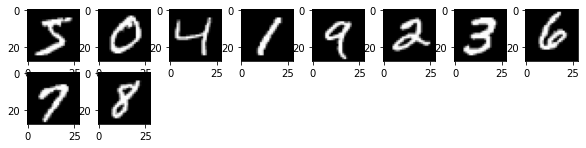

In [1]:
# your code
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pandas as pd
from collections import Counter


(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.gray() # B/W Images
plt.figure(figsize = (10,9)) # Adjusting figure size
# Displaying a grid of 3x3 images
not_to_print = [6,8,9,10,11,12,14,16]
j = 0
for i in range(18):
  if i not in not_to_print:
    plt.subplot(8,8,j+1)
    plt.imshow(x_train[i])
    j += 1

# Data Normalization
# Conversion to float
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')

# Normalization
X_train = x_train/255.0
X_test = x_test/255.0

X_train = x_train.reshape(X_train.shape[0], 784)
X_test = x_test.reshape(X_test.shape[0], 784)

### Bernoulli Naive Bayes
If we know how the digits are generated, then we know how to classify them (simply choose the digit class which will maximize the posterior probability) --- but which model should we use for describing the digits generation?

In this part we will try a very simplified model of digits creation (which is obviously not the same as the "real" model), using a Naive Bayes over an underlying Bernoulli distribution --- that is, we will assume that given a digit class, the pixels of the images are the result of independent coin flips, each with its own "head" probability.

Note that since we assume each pixl is either 0 (black) or 1 (white), we will need to adjust (preprocess) our data accrodingly (see below).

So, the model is stated as follows:
$$
\begin{align}
\text{Domain} && x \in \{0,1\}^{784} \\
\text{Prior} && \pi_j = \Pr(y=j) \\
\text{Likelihood} && P_j(x) = \Pr(x | y=j) \\
\end{align}
$$

Where for each $i\in 0\ldots 784$ it holds that
$$
P_{ji}(x_i) = \Pr(x_i | y=j) =
\begin{cases}
p_{ji} & \text{if } x_i=1 \\
1-p_{ji} & \text{if } x_i=0 \\
\end{cases}
$$


#### Question 1
Write the classification rule based on this Naive Bayes model. 
How would you esitmate each of the parameters of the model based on the trainning data? 
Describe in text (preferably math notationns) the classification rule, and explain.

**Note:** Think of edge cases which may effect your estimator in an undesired way.

#### Answer 1
The classification rule for a Naive Bayes model is as follows:

Calculate the probability that an instance belongs to each class by multiplying the probabilities of each feature belonging to that class.
Choose the class with the highest probability as the predicted class for the instance.
To estimate the parameters of the model, we would need to count the number of times each feature occurs in each class in the training data, and then divide these counts by the total number of occurrences of that feature in the training data to obtain the probabilities of each feature belonging to each class. 

$$ \hat{y} = \arg \max_{c \in C} P(c|x) $$

where $C$ is the set of classes, $x$ is the instance to be classified, and $\hat{y}$ is the predicted class. This can be calculated using the following formula:

$$ P(c|x) = \frac{P(x|c)P(c)}{P(x)} $$

where $P(x|c)$ is the probability of the features belonging to class $c$, $P(c)$ is the prior probability of class $c$, and $P(x)$ is the probability of the features.




#### Question 2
Run a Naive Bayes classifier on the training data and apply predictions on the test data. Use the [sklearn.naive_bayes.BernoulliNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) implementation (see the [source code for sklearn.naive_bayes](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/naive_bayes.py) for details).

Remember we need to preprocess the data in this case such that each pixel would become either black (0) or white (1). For this, use the `binarize` parameter of the implementation. Set this value to $0$ (this is the default), which in this case would mean every pixel with non-zero value will be set to 1.

1. Plot the mean image of each class (estimated $\hat{p}_{ji}$) and generate one sample of each class (remember, you can do this since this is a generative model). You will need to access the `feature_log_prob_` attribute of the trained model.

2. Plot the confusion matrix of your classifier, as claculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.

3. Think of a way you can find the optimal threshold of the binarization part. **There is no need to actually perform this task --- just describe what you would have done.**


#### Answer 2



<Figure size 432x288 with 0 Axes>

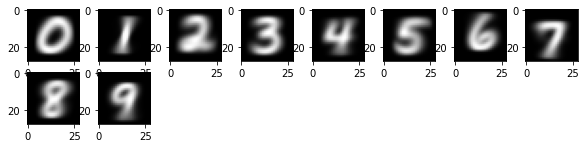

In [2]:
# code goes here
# alpha 1e-10 found with CV method, but not possible to use CV if we will like to use feature_log_prob_ attribute
naive_algorithm = BernoulliNB(alpha=1e-10).fit(X_train, y_train)
y_predict = naive_algorithm.predict(X_test)
# 1
p_w_c = np.exp(naive_algorithm.feature_log_prob_)
p_c_w = p_w_c.reshape(-1,1)
p_c_w = p_c_w.reshape(10,28,28)
p_c_w = p_c_w * 255

plt.gray() # B/W Images
plt.figure(figsize = (10,9)) # Adjusting figure size
# Displaying a grid of 3x3 images
for i in range(10):
 plt.subplot(8,8,i+1)
 plt.imshow(p_c_w[i])


In [3]:
# 2
print("Accuracy: ", accuracy_score(y_test, y_predict, normalize = True))
pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=y_predict))

Accuracy:  0.8419


,0,1,2,3,4,5,6,7,8,9
0,887,0,4,7,2,41,16,1,22,0
1,0,1085,10,5,0,9,6,0,19,1
2,19,8,856,28,17,4,30,14,54,2
3,5,15,34,845,0,13,9,18,45,26
4,2,6,4,0,795,5,20,1,23,126
5,23,12,7,130,30,627,16,7,21,19
6,18,18,16,2,12,35,851,0,6,0
7,1,24,13,4,14,0,0,870,28,74
8,16,23,13,76,17,23,6,6,757,37
9,9,13,5,9,72,9,0,24,22,846


**Answer Q2:**
As we can see the predict value and the real value with high accuracy score.
But, there is some outliers with wrong label, like the 5 real label and 3 predict.

**Answer Q3:**
To find the optimal threshold of the **binarization** i will perform a **CV** (cross validation) method with different values.
The result will be the Naive Bayes Algorithm with the best binarization value.

## 2. Classifing Text Documents using Multinomial Naive Bayes
In this exercise you will classify the "20 newsgroups" data set using your own naive bayes classifier and compare to the scikit learn built in version.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon messages posted before and after a specific date.

### You task
Implement the barebone class provided: `NaiveBayes(BaseEstimator, ClassifierMixin)` and implement its `fit`, `predict` and `predict_log_proba` methods.

Then follow next anlysis guidlinnes using the implemented class for train and test classifier:
* Load the **train** data using `from sklearn.datasets import fetch_20newsgroups`. remove headers, footers and quotes (see documentation)
* Use `sklearn.feature_extraction.text import CountVectorizer` to count words (`stop_words='english'`)
* use `sklearn.pipeline.make_pipeline` to chain the vectroizer and model.
* note: limit the vocuabolary size if you encounter memory issues
* compare the accuracy over the **test** data. You can use `accuracy_score, classification_report`
* compare to the built in `sklearn.naive_bayes.MultinomialNB`
* compare to `TfidfVectorizer` preprocessing (you can use the built in model for doing the analysis)
* plot the learning curve by sample size (you can use [learning_curve](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html) function from `sklearn.model_selection`)- is the model in the bias or variance regime (you can use the built in model for doing the analysis)
* optimize performance in respect to vectorizer hyper parameters (e.g. max_features, max_df etc.) (you can use the built in model for doing the analysis).

In [9]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import sklearn.model_selection
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import learning_curve


class NaiveBayes(BaseEstimator, ClassifierMixin):
  '''
  BaseEstimator and ClassifierMixin are imported from sklearn.base
  '''
  def __init__(self):
    self.word_label_prob = None
    self.label_prob = None

  def fit(self, x, y):
    #                (sum of the values for the class y and the feature i) + (Laplace parameter (1))
    # ------------------------------------------------------------------------------------------------------------
    # (overall sum of all the values in the database for the class y) + (Laplace parameter) * (number of features)
    
    x = x.toarray()
    self.word_label_prob = {i:np.array([]) for i in set(y)}
    # calculate prob for each label
    self.label_prob = Counter(y)
    for l in self.label_prob:
      self.label_prob[l] /= len(y)

    # create dictinary of all rows for each label
    for i in range(x.shape[0]):
      if self.word_label_prob[y[i]].shape[0] == 0:
        self.word_label_prob[y[i]] = np.array(x[i])
      else:
        self.word_label_prob[y[i]] = np.vstack((self.word_label_prob[y[i]], np.array(x[i])))
    # calculates
    for l in self.word_label_prob:
      # sum all columns, means sum each word in the same label
      self.word_label_prob[l] = self.word_label_prob[l].sum(axis=0)
      # add 1 to prevent zero probability
      self.word_label_prob[l] += 1
      # calculate probabilty for each word in each label
      label_size = np.sum(self.word_label_prob[l])
      self.word_label_prob[l] = [(self.word_label_prob[l][i] / label_size) for i in range(self.word_label_prob[l].shape[0])]

  def predict_log_proba(self, x):
    x = x.toarray()
    labels = list(self.label_prob.keys())
    text_label_prob = {f'news {i}':{l:1 for l in labels} for i in range(len(x))}
    for i in range(len(x)): # iterate over texts
      for l in labels:
        text_label_prob[f'news {i}'][l] = self.word_label_prob[l] * x[i]
        text_label_prob[f'news {i}'][l] = np.prod(text_label_prob[f'news {i}'][l], where = text_label_prob[f'news {i}'][l] > 0)
        text_label_prob[f'news {i}'][l] *= self.label_prob[l]
        if text_label_prob[f'news {i}'][l] != 0:
          text_label_prob[f'news {i}'][l] = np.log(text_label_prob[f'news {i}'][l])
    return text_label_prob

  def predict(self, x):
    log_prob = self.predict_log_proba(x)
    predict_labels = [max(log_prob[key], key=log_prob[key].get) for key in log_prob]
    return predict_labels

train = fetch_20newsgroups(remove= ('headers', 'footers', 'quotes'), subset= 'train')
x_train = train.data
y_train = train.target
test = fetch_20newsgroups(remove= ('headers', 'footers', 'quotes'), subset= 'test')
x_test = test.data
y_test = test.target  
model = NaiveBayes()
vectorizer = CountVectorizer(stop_words='english', max_features=4000)
pipeline = make_pipeline(vectorizer, model)
fit_data = pipeline.fit(x_train, y_train)
y_predicted = fit_data.predict(x_test)
print(classification_report(y_test, y_predicted))


              precision    recall  f1-score   support

           0       0.37      0.42      0.39       319
           1       0.44      0.59      0.50       389
           2       0.01      0.01      0.01       394
           3       0.47      0.57      0.51       392
           4       0.46      0.59      0.52       385
           5       0.70      0.57      0.63       395
           6       0.77      0.66      0.71       390
           7       0.26      0.65      0.37       396
           8       0.59      0.67      0.63       398
           9       0.63      0.66      0.64       397
          10       0.44      0.54      0.49       399
          11       0.81      0.53      0.64       396
          12       0.56      0.50      0.53       393
          13       0.69      0.53      0.60       396
          14       0.76      0.54      0.63       394
          15       0.52      0.52      0.52       398
          16       0.53      0.47      0.50       364
          17       0.68    

In [20]:
vectorizer = CountVectorizer(stop_words='english')
pipeline = make_pipeline(vectorizer, MultinomialNB())
train_sizes, train_scores, test_scores = learning_curve(pipeline, x_train, y_train,
                                                        scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10, 20))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

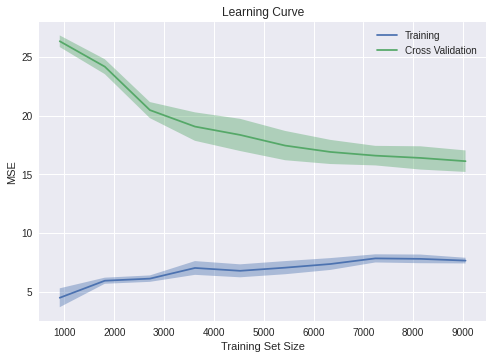

In [22]:
# plot
plt.style.use('seaborn')
# plt.subplots(1, figsize=(6,6))
plt.plot(train_sizes, -train_mean,label="Training")
plt.plot(train_sizes, -test_mean, label="Cross Validation")
plt.fill_between(train_sizes, -(train_mean - train_std), -(train_mean + train_std), alpha=0.4)
plt.fill_between(train_sizes, -(test_mean - test_std), -(test_mean + test_std), alpha=0.4)
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("MSE"), plt.legend(loc="best")
plt.show()

#### Model interpretability
Find the most important features for a **specific** decision of a NB classifier.
Because the model has learned the prior $p(x_i|c)$ during the training, the contribution of an individual feature value can be easily measured by the posterior, $p(c|x_i)=p(c)p(x_i|c)/p(x_i)$
Implement a function which gets a scikit-learn NB model as input and returns $P(c|x_i)$:

`def calc_p_c_given_xi(model)`

Hint: Use the following model properties:

* `model.class_log_prior_`
* `model.feature_log_prob_`

Note: remember these are logs and you need to use np.exp and normalize to get $P(c|x_i)$ 
Another hint: use numpy built-in broadcasting property.

* Use the interpretation to examine errors of the classifier where $\hat{c}\ne c$. Which top words support the correct class and which support the wrong class? You can use the `print_txt` below to color words.

In [5]:
import string
def print_txt(txt, hot, cold):
  """
  print the text, coloring hot and cold words with colors
  """
  cold_color='\x1b[41;37m{}\x1b[0m'
  hot_color='\x1b[42;37m{}\x1b[0m'
  mid_color='\x1b[45;37m{}\x1b[0m'
  def color(token):
    lower = str(token).lower()
    lower = lower.replace('\t','').replace('\n','')
    lower = lower.translate(string.punctuation)
    if (lower in hot) and (lower in cold):
      return mid_color.format(token)
    elif lower in hot:
      return hot_color.format(token)
    elif lower in cold:
      return cold_color.format(token)
    else:
      return token
  colored_txt = " ".join([color(token) for token in txt.split(' ')])
  print(colored_txt)
print_txt('This word support the first class but this the other', ['word'],['other'])

This word support the first class but this the other


In [49]:
from sklearn.datasets import fetch_20newsgroups, fetch_20newsgroups_vectorized
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import sys
import numpy as np
from scipy.stats import binom
import string


random_state = 42
shuffle = True
remove = []
data_dict = {}
for subset in ["train", "test"]:
  data = fetch_20newsgroups(subset=subset,
                            shuffle=shuffle, 
                            random_state=random_state,
                            remove=remove)
  data_dict[subset] = data
  n = len(data.data)
  print("{} - {} documents".format(subset, n))
X_train, y_train = data_dict['train'].data, data_dict['train'].target
X_test, y_test = data_dict['test'].data, data_dict['test'].target
target_names = data_dict['train'].target_names


max_features=2**16
vectorizer = CountVectorizer(stop_words='english')
model = MultinomialNB()
pipeline = make_pipeline(vectorizer, model)
pipeline.fit(X_train, y_train)

pred = pipeline.predict(X_test)

def p_c_given_xi(model):
  # you code goes here
  p_c = np.exp(model.class_log_prior_)
  p_w_c = np.exp(model.feature_log_prob_)
  p_c_w = p_c.reshape(-1,1)* p_w_c
  p_c_w = p_c_w/p_c_w.sum(axis=0)
  return p_c_w
p_c_w = p_c_given_xi(model)


x = vectorizer.transform(X_test)
idx2word={v:k for k, v in vectorizer.vocabulary_.items()}
cold_color='\x1b[41;37m{}\x1b[0m'
hot_color='\x1b[42;37m{}\x1b[0m'
mid_color='\x1b[45;37m{}\x1b[0m' 
def word_by_score(c, word_index, min_p=0.1, max_n=10):
  """
  return a pandas series with index being the word and its index and the value being p(c|xi)
  """
  word_score = p_c_w[c, word_index]
  words =[idx2word[w] for w in word_index]
  s = pd.Series(word_score.flatten(), index=[words, word_index])
  s.index.names=['word','idx']
  s.name = 'score'
  stop = s.sort_values(ascending=False)
  stop = stop[stop>min_p]
  if len(stop)>max_n:
    stop = stop[:max_n]
  return stop.reset_index()


def display_doc(i):
  """
  displaying document i
  """
  c_hat = pred[i]
  c = y_test[i]
  txt = X_test[i]
  xi = x[i,:]
  nz = xi.nonzero()[1] # non zero words

  print('')
  print('document={}, c={} ({}), guess correctly = {}'.format(i, c, target_names[c], c_hat==c))
  print('-'*80)
  hot = word_by_score(c,nz)
  print(hot)
  hot_words = hot.word.tolist()
  if c_hat!=c:
    print('-'*80)
    print('score for incorrect guess c_hat={} ({})'.format(c_hat, target_names[c_hat]))
    print('-'*80)
    cold = word_by_score(c_hat,nz)
    cold_words = cold.word.tolist()
    print(cold)
  else:
    cold_words = []
  print('-'*80)
  print('text:')
  print('-'*80)
  print_txt(txt, hot_words, cold_words)


i = 7
display_doc(i)


train - 11314 documents
test - 7532 documents

document=7, c=15 (soc.religion.christian), guess correctly = False
--------------------------------------------------------------------------------
      word     idx     score
0   hebrew   62426  0.308904
1     paul   92220  0.267955
2   africa   26589  0.210263
3     word  124691  0.208367
4  perfect   92787  0.141767
5    greek   60165  0.126291
6  lexicon   75340  0.117796
--------------------------------------------------------------------------------
score for incorrect guess c_hat=5 (comp.windows.x)
--------------------------------------------------------------------------------
         word     idx     score
0        file   55216  0.315000
1     restore  101196  0.239511
2       email   51190  0.142708
3          ac   25515  0.140652
4     package   91444  0.120794
5      thanks  114195  0.116164
6  appreciate   28901  0.113957
7         und  118273  0.112628
8  processing   95900  0.111857
9     address   26082  0.109681
--------

#### Think and describe:
#### How can you correct the analyzed error?

To read more about model interpretation, see the blogpost below and the tutorial:
* https://lilianweng.github.io/lil-log/2017/08/01/how-to-explain-the-prediction-of-a-machine-learning-model.html
* https://github.com/chanansh/right_but_why

To correct the error in a Multinomial Naive Bayes classifier:

1. Check your training data to make sure it is clean and representative of the problem you are trying to solve. If your training data is noisy or not representative, the classifier may not be able to learn accurately.

2. Tune the hyperparameters of your model, such as the smoothing parameter, to improve its performance on the training data.

3. Consider using a different type of Naive Bayes classifier, such as Gaussian Naive Bayes, which may be better suited to your data.

4. Use cross-validation to evaluate the performance of your model and compare it to other potential models. This can help you identify the best model for your data.